In [ ]:
#import libray
import pandas as pd

# Final Project: NBA Edition

**Hypothesis:** There is a significant difference in the level of versatility exhibited by players in different positions in the NBA regarding their contributions across multiple performance categories.

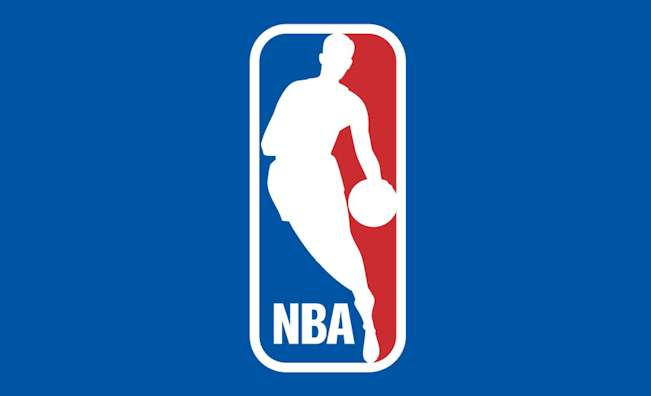



# **Data**

The data I chose came from:

*   [Kaggle](https://www.kaggle.com/datasets/tanatmetmaolee/nba-player-statistics-2023/code)
*   [Espn](http://www.espn.com/nba/seasonleaders)

*   [NBA](https://www.nba.com/stats/players/traditional?SeasonType=Regular+Season&PerMode=Totals)

Once downloaded upload via the file explorer to the left tab so we can import to the notebook as a pandas dataframe.


In [ ]:
df = pd.read_csv('/content/2023_nba_player_stats.csv')

Now that our data has been imported, we can now asses the question.

When comparing different positions is there a significant difference in the level of versatility exhibited by players in the NBA regarding their contributions across multiple performance categories.

We can address this with a few steps


1.   Group the players based on their positions (e.g., point guard, shooting guard, small forward, power forward, center).
2.   Calculate the average performance metrics for each position, considering categories such as points, rebounds, assists, steals, blocks, shooting percentages, etc.
3.   Measure the level of versatility exhibited by players across multiple performance categories by using composite scores and compare scores.
4.   Compare the scores of the top 15 players versatility scores with the average scores of their respective positions.

By following these steps, it is possible to analyze and determine if specific positions in the NBA showcase a higher level of versatility in terms of contributing across multiple performance categories.


In [ ]:
#creates a copy of data set
df_scaled = df.copy()

#creates a list of columns to scale
columns = list(df.keys())
columns_scaled = columns[8:]

In [ ]:
#loop normalizes columns using min max feature scaling
for column in columns_scaled:
    #determines the range of the column by subracting the max and min
    column_range = df_scaled[column].max() - df_scaled[column].min()
    #normalizes each value by the formula scaled = (value - min) / range
    df_scaled[column] = (df_scaled[column] - df_scaled[column].min())/column_range
    #creates a new column Composite Score and sums the normalized values of points, rebounds, assists, blocks, steals, and plus/minus
    df_scaled['Composite Score'] = df_scaled['PTS'] + df_scaled['REB'] + df_scaled['AST'] + df_scaled['BLK'] + df_scaled['STL']+df_scaled['+/-']

#arranges the dataset by descending Composite Score column
df_scaled = df_scaled.sort_values(by=['Composite Score'], ascending=False)

Now that we have our normalized composite score for each player, we can get the average of each position.

In [ ]:
#creates a dictionary to hold the averages
positions_avg = {
    'PG': 0,
    'SG': 0,
    'SF': 0,
    'PF': 0,
    'C': 0}
#creates a list of the 5 positions of basketball
positions = ['PG', 'SG', 'SF', 'PF', 'C']

In [ ]:
#loop iterates through each position and computes the average composite score and updates the dictionary
for pos in positions:
    df_positions = df_scaled.loc[df_scaled['POS'] == pos]
    avg = df_positions['Composite Score'].mean()
    positions_avg.update({pos:avg})



In [ ]:
#obtains the posistion with the highest score using the max function
#the positions_avg.get specifies the max value comes from the dictionary values
versatile_position = max(positions_avg, key=positions_avg.get)
print("The most versatile position according to the 2023 stats is "+versatile_position)

The most versatile position according to the 2023 stats is PG


In [ ]:
#reveals the score of each position
for pos, score in positions_avg.items():
  print(f'the score of {pos} is: {score:.3f}')

the score of PG is: 1.816
the score of SG is: 1.679
the score of SF is: 1.616
the score of PF is: 1.699
the score of C is: 1.567


From the data and after computing the composite score we see that the point guards rated the highest whereas the center position scored the lowest.

Tid Bit:

Here is a look at the score of a recent Gaucho who is shined in the NBA Finals

In [ ]:
ucsb_alumni = df_scaled.loc[df_scaled['Player'] == 'Gabe Vincent']
score = float(ucsb_alumni['Composite Score'])
print(f"This is Gabe Vincent\'s score: {score:.3f}")

This is Gabe Vincent's score: 1.652
